In [103]:
#呼叫所需套件
import pandas as pd
import numpy as np
from scipy import stats

In [104]:
# 呼叫CSV檔
data2357 = pd.read_excel("hw2_TEJ_UTF8.xlsx",sheet_name="2357華碩")
data2498 = pd.read_excel("hw2_TEJ_UTF8.xlsx",sheet_name="2498宏達電")
data9999 = pd.read_excel("hw2_TEJ_UTF8.xlsx",sheet_name="Y9999加權指數")
data2357

,ID,NAME,DATE,Y,M,D,CLOSE,RETURN,Unnamed: 8,Unnamed: 9
0,2357,華碩,NaN,2016,1,4,262.0,NaN,直接輸入函數,NaN
1,2357,華碩,NaN,2016,1,5,261.5,NaN,華碩,NaN
2,2357,華碩,NaN,2016,1,6,264.0,NaN,平均數,NaN
3,2357,華碩,NaN,2016,1,7,268.0,NaN,NaN,NaN
4,2357,華碩,NaN,2016,1,8,276.5,NaN,中位數,NaN
...,...,...,...,...,...,...,...,...,...,...
239,2357,華碩,NaN,2016,12,26,264.0,NaN,NaN,NaN
240,2357,華碩,NaN,2016,12,27,264.5,NaN,NaN,NaN
241,2357,華碩,NaN,2016,12,28,264.0,NaN,NaN,NaN
242,2357,華碩,NaN,2016,12,29,263.0,NaN,NaN,NaN


In [105]:
# Create three stock RETURN
data2357['RETURN']=np.log(data2357.CLOSE) - np.log(data2357.CLOSE.shift(1))
data2498['RETURN']=np.log(data2498.CLOSE) - np.log(data2498.CLOSE.shift(1))
data9999['RETURN']=np.log(data9999.CLOSE) - np.log(data9999.CLOSE.shift(1))
data2357

,ID,NAME,DATE,Y,M,D,CLOSE,RETURN,Unnamed: 8,Unnamed: 9
0,2357,華碩,NaN,2016,1,4,262.0,NaN,直接輸入函數,NaN
1,2357,華碩,NaN,2016,1,5,261.5,-0.001910,華碩,NaN
2,2357,華碩,NaN,2016,1,6,264.0,0.009515,平均數,NaN
3,2357,華碩,NaN,2016,1,7,268.0,0.015038,NaN,NaN
4,2357,華碩,NaN,2016,1,8,276.5,0.031224,中位數,NaN
...,...,...,...,...,...,...,...,...,...,...
239,2357,華碩,NaN,2016,12,26,264.0,0.000000,NaN,NaN
240,2357,華碩,NaN,2016,12,27,264.5,0.001892,NaN,NaN
241,2357,華碩,NaN,2016,12,28,264.0,-0.001892,NaN,NaN
242,2357,華碩,NaN,2016,12,29,263.0,-0.003795,NaN,NaN


# Descriptive Statistics

In [106]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])                      
# descriptive_statistics_result = pd.DataFrame(data, columns=['RETURN'])
# descriptive_statistics_result.apply(descriptive_statistics)

result2357 = pd.DataFrame(data2357, columns=['RETURN'])
result2357_description = result2357.apply(descriptive_statistics)
# result2357.head()
result2498 = pd.DataFrame(data2498, columns=['RETURN'])
result2498_description = result2498.apply(descriptive_statistics)

result9999 = pd.DataFrame(data9999, columns=['RETURN'])
result9999_description = result9999.apply(descriptive_statistics)

# descriptive_statistics_result = [result2357_description, result2498_description, result9999_description]
# descriptive_statistics_result
# result = pd.concat([result2498_description.squeeze().rename("2498"), result2357_description.squeeze().rename("2357"), result9999_description.squeeze().rename("9999")], axis = 1)
# result = pd.append(data2357.RETURN,data2498.RETURN,data9999.RETURN)
# result.columns=['2498','2357','9999']
# result.head()

#合併三個資料的Return
result = pd.DataFrame([data2357.RETURN, data2498.RETURN, data9999.RETURN]).T
result.columns =  ['2357','2498','9999']
result

#合併三個資料的Description Statistics
result_description = pd.concat([result2357_description, result2498_description, result9999_description], axis = 1)
result_description.columns = ['2357','2498','9999']
result_description

,2357,2498,9999
mean,0.000047,0.000000,0.000541
median,0.000000,0.000000,0.000891
std,0.013124,0.036106,0.008170
var,0.000172,0.001304,0.000067
kurtosis,3.046940,1.572220,1.455461
skewness,0.225822,0.115705,-0.209733
min,-0.045257,-0.105361,-0.030203
max,0.059461,0.095310,0.027759
sum,0.011385,0.000000,0.131379
count,243.000000,243.000000,243.000000


# 常見的圖形繪製
# (1)直方圖

In [107]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

e:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, '2357 ASUS Return Histogram')

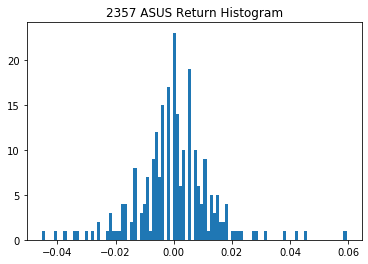

In [108]:
#第一種直方圖 #單一圖形
plt.hist(data2357.RETURN, bins=100) 
plt.title("2357 ASUS Return Histogram")
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

Text(0.5, 1.0, '9999')

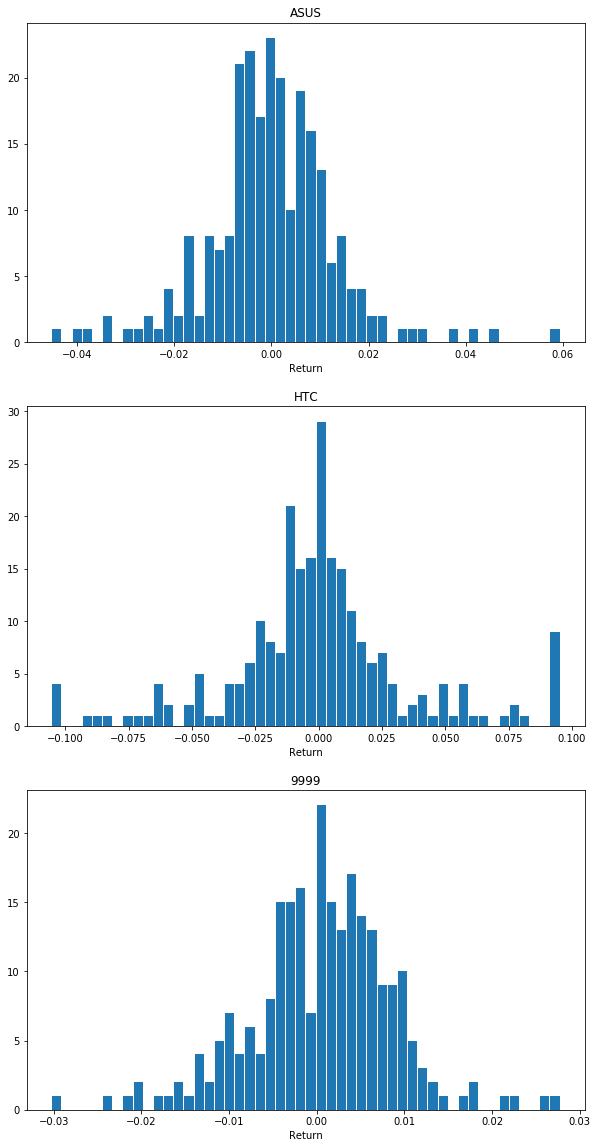

In [109]:
# #第二種直方圖 
# fig=plt.figure(figsize=(10,20))

# #繪製2357直方圖
# p1=fig.add_subplot(311)
# plt.hist(data2357.RETURN,bins=50,rwidth=0.9)
# plt.xlabel('Return')
# plt.title("ASUS Return")

# #繪製2498直方圖
# p2=fig.add_subplot(312)
# plt.hist(data2498.RETURN,bins=50,rwidth=0.9)
# plt.xlabel('Return')
# plt.title("HTC Return")

# #繪製9999直方圖
# p3=fig.add_subplot(313)
# plt.hist(data9999.RETURN,bins=50,rwidth=0.9)
# plt.xlabel('Return')
# plt.title("9999 Return")

#第二種直方圖 
fig=plt.figure(figsize=(10,20))

#繪製2357直方圖
p1=fig.add_subplot(311)
plt.hist(result['2357'],bins=50,rwidth=0.9)
plt.xlabel('Return')
plt.title("ASUS")

#繪製2498直方圖
p2=fig.add_subplot(312)
plt.hist(result['2498'],bins=50,rwidth=0.9)
plt.xlabel('Return')
plt.title("HTC")

#繪製9999直方圖
p3=fig.add_subplot(313)
plt.hist(result['9999'],bins=50,rwidth=0.9)
plt.xlabel('Return')
plt.title("9999")

Text(0.5, 1.0, 'Return')

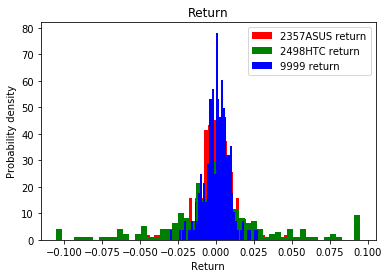

In [110]:
#第三種直方圖 
plt.hist(result['2357'],bins=50, density=True,label='2357ASUS return',color='r')
plt.hist(result['2498'],bins=50, density=True,label='2498HTC return',color='g')
plt.hist(result['9999'],bins=50, density=True,label='9999 return',color='b')

plt.legend()
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.title("Return")